# **Step 1: Clone YOLO V5 from github**

In [ ]:
import torch
from IPython.display import Image
import os
import shutil
from random import choice

In [ ]:
# Clone YOLOv5 and install requirements
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17493, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 17493 (delta 1), reused 0 (delta 0), pack-reused 17490 (from 3)
Receiving objects: 100% (17493/17493), 16.56 MiB | 17.73 MiB/s, done.
Resolving deltas: 100% (11996/11996), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00

# **Step2: Import Dataset and unzip**

In [ ]:
!unzip -q ../dataset.zip -d ../

In [ ]:
!unzip -q ../ts.zip -d ../

In [ ]:
# Set paths
crs_path = "/content/ts"  # original location of the images and labels
train_images = "/content/dataset/images/train"
train_labels = "/content/dataset/labels/train"
val_images = "/content/dataset/images/val"
val_labels = "/content/dataset/labels/val"

In [ ]:
# Create directories if not exist
os.makedirs(train_images, exist_ok=True)
os.makedirs(train_labels, exist_ok=True)
os.makedirs(val_images, exist_ok=True)
os.makedirs(val_labels, exist_ok=True)

In [ ]:
# Prepare lists
imgs = []
xmls = []

# Gather image and annotation filenames
for (dirname, drs, files) in os.walk(crs_path):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)

# Split ratios
train_ratio = 0.8
val_ratio = 0.2
count_for_train = int(len(imgs) * train_ratio)
count_for_val = int(len(imgs) * val_ratio)

print("Training images:", count_for_train)
print("Validation images:", count_for_val)

Training images: 592
Validation images: 148


In [ ]:
# Split training data
for _ in range(count_for_train):
    fileJpg = choice(imgs)
    fileXml = fileJpg[:-4] + '.txt'

    shutil.copy(os.path.join(crs_path, fileJpg), os.path.join(train_images, fileJpg))
    shutil.copy(os.path.join(crs_path, fileXml), os.path.join(train_labels, fileXml))

    imgs.remove(fileJpg)
    xmls.remove(fileXml)

# Remaining goes to validation
for fileJpg in imgs:
    fileXml = fileJpg[:-4] + '.txt'
    shutil.copy(os.path.join(crs_path, fileJpg), os.path.join(val_images, fileJpg))
    shutil.copy(os.path.join(crs_path, fileXml), os.path.join(val_labels, fileXml))

# Print final counts
print("Final train image count:", len(os.listdir(train_images)))
print("Final val image count:", len(os.listdir(val_images)))

Final train image count: 592
Final val image count: 149


In [ ]:
# Disable W&B tracking to avoid API login prompt
os.environ['WANDB_DISABLED'] = 'true'

# Start YOLOv5 training
!python train.py --img 640 --batch 16 --epochs 100 --data traffic.yaml --weights yolov5s.pt --cache

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      36/99      3.93G    0.02962   0.006417   0.003705         45        640:  95% 35/37 [00:08<00:00,  4.08it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      36/99      3.93G    0.02953   0.006394   0.003679         38        640:  97% 36/37 [00:08<00:00,  4.20it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      36/99      3.93G    0.02949   0.006381   0.003684         44        640: 100% 37/37 [00:08<00:00,  4.12it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:01<00:00,  3.14it/s]
                   all        149        249      0.894      0.90

In [ ]:
#save best weights for future use
from google.colab import files
files.download('/content/yolov5/runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

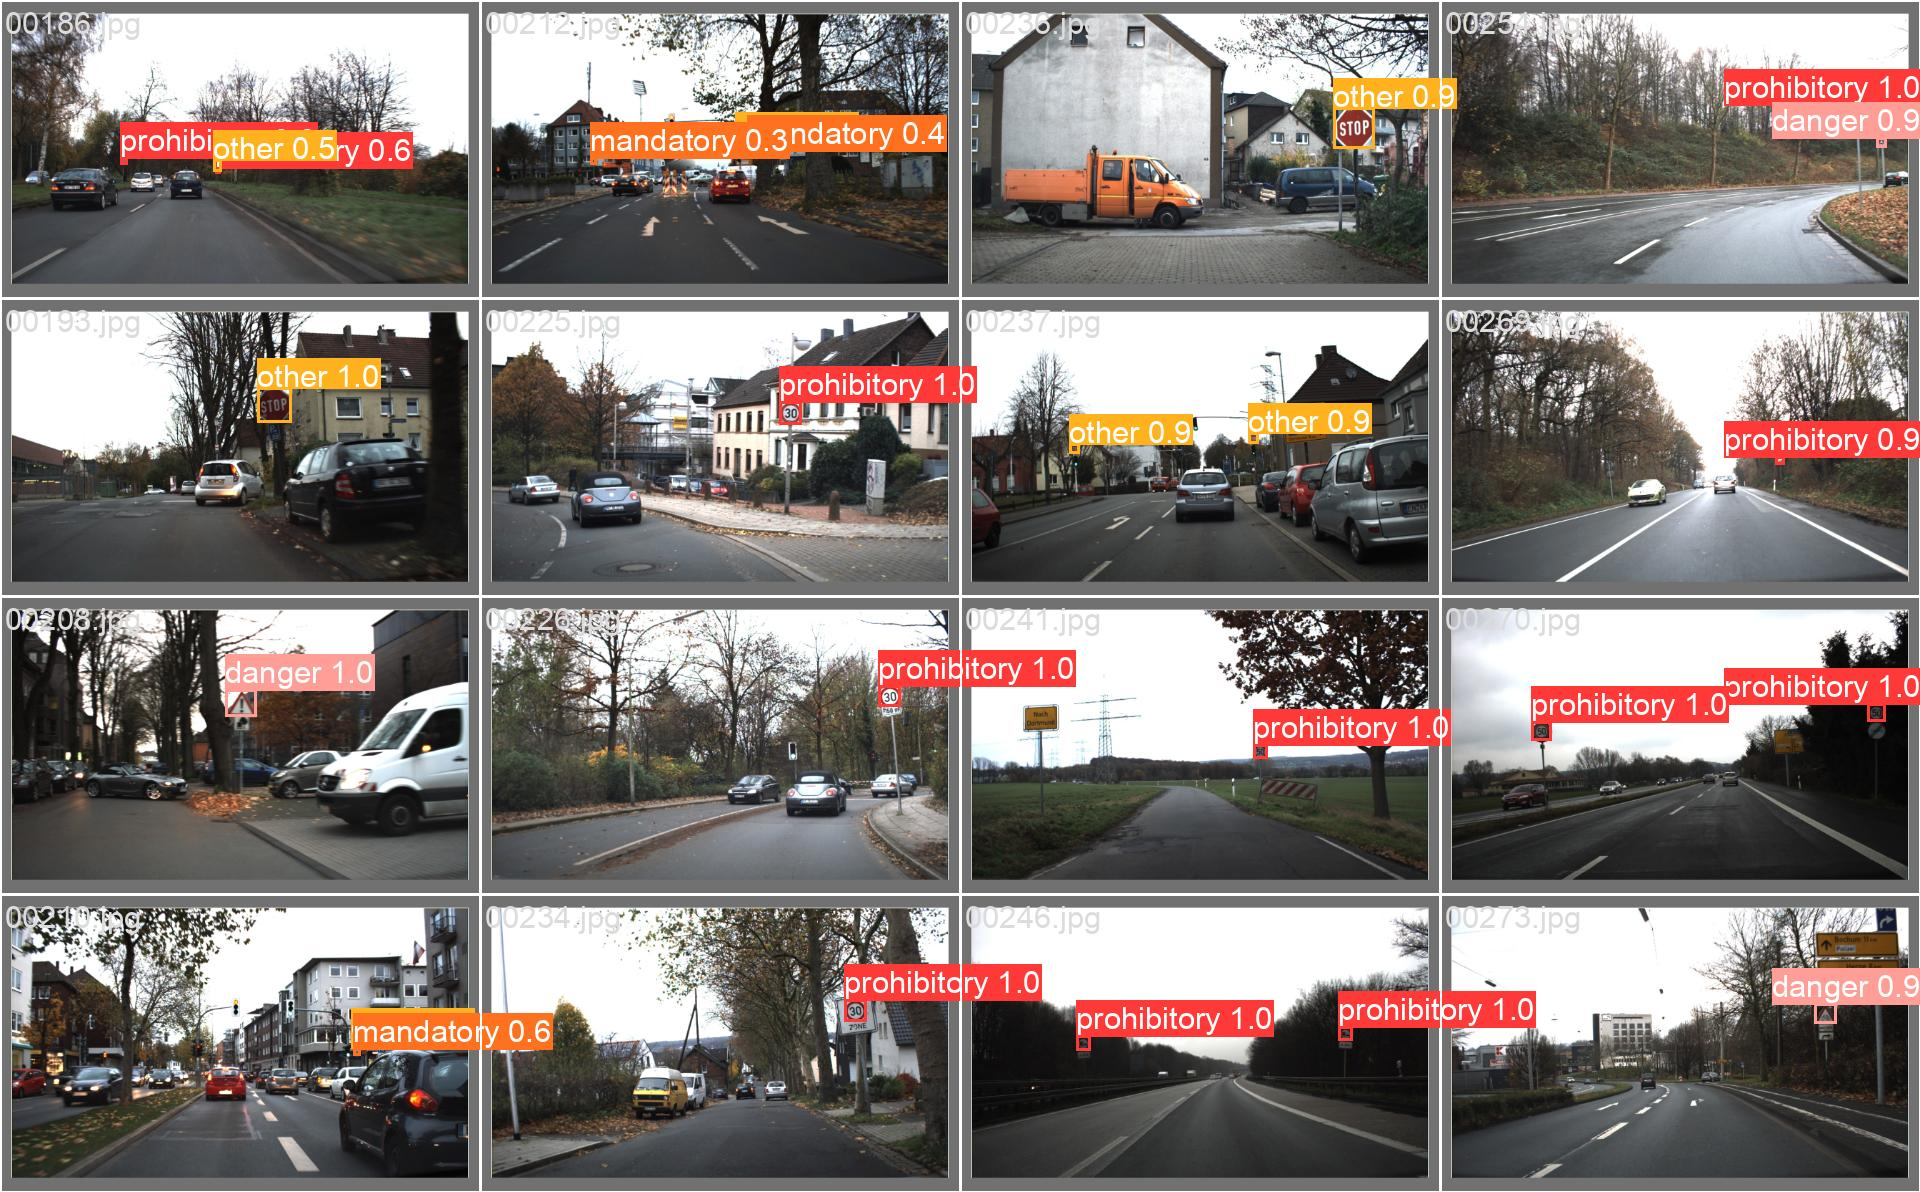

In [ ]:
Image(filename='/content/yolov5/runs/train/exp/val_batch1_pred.jpg', width=1000)

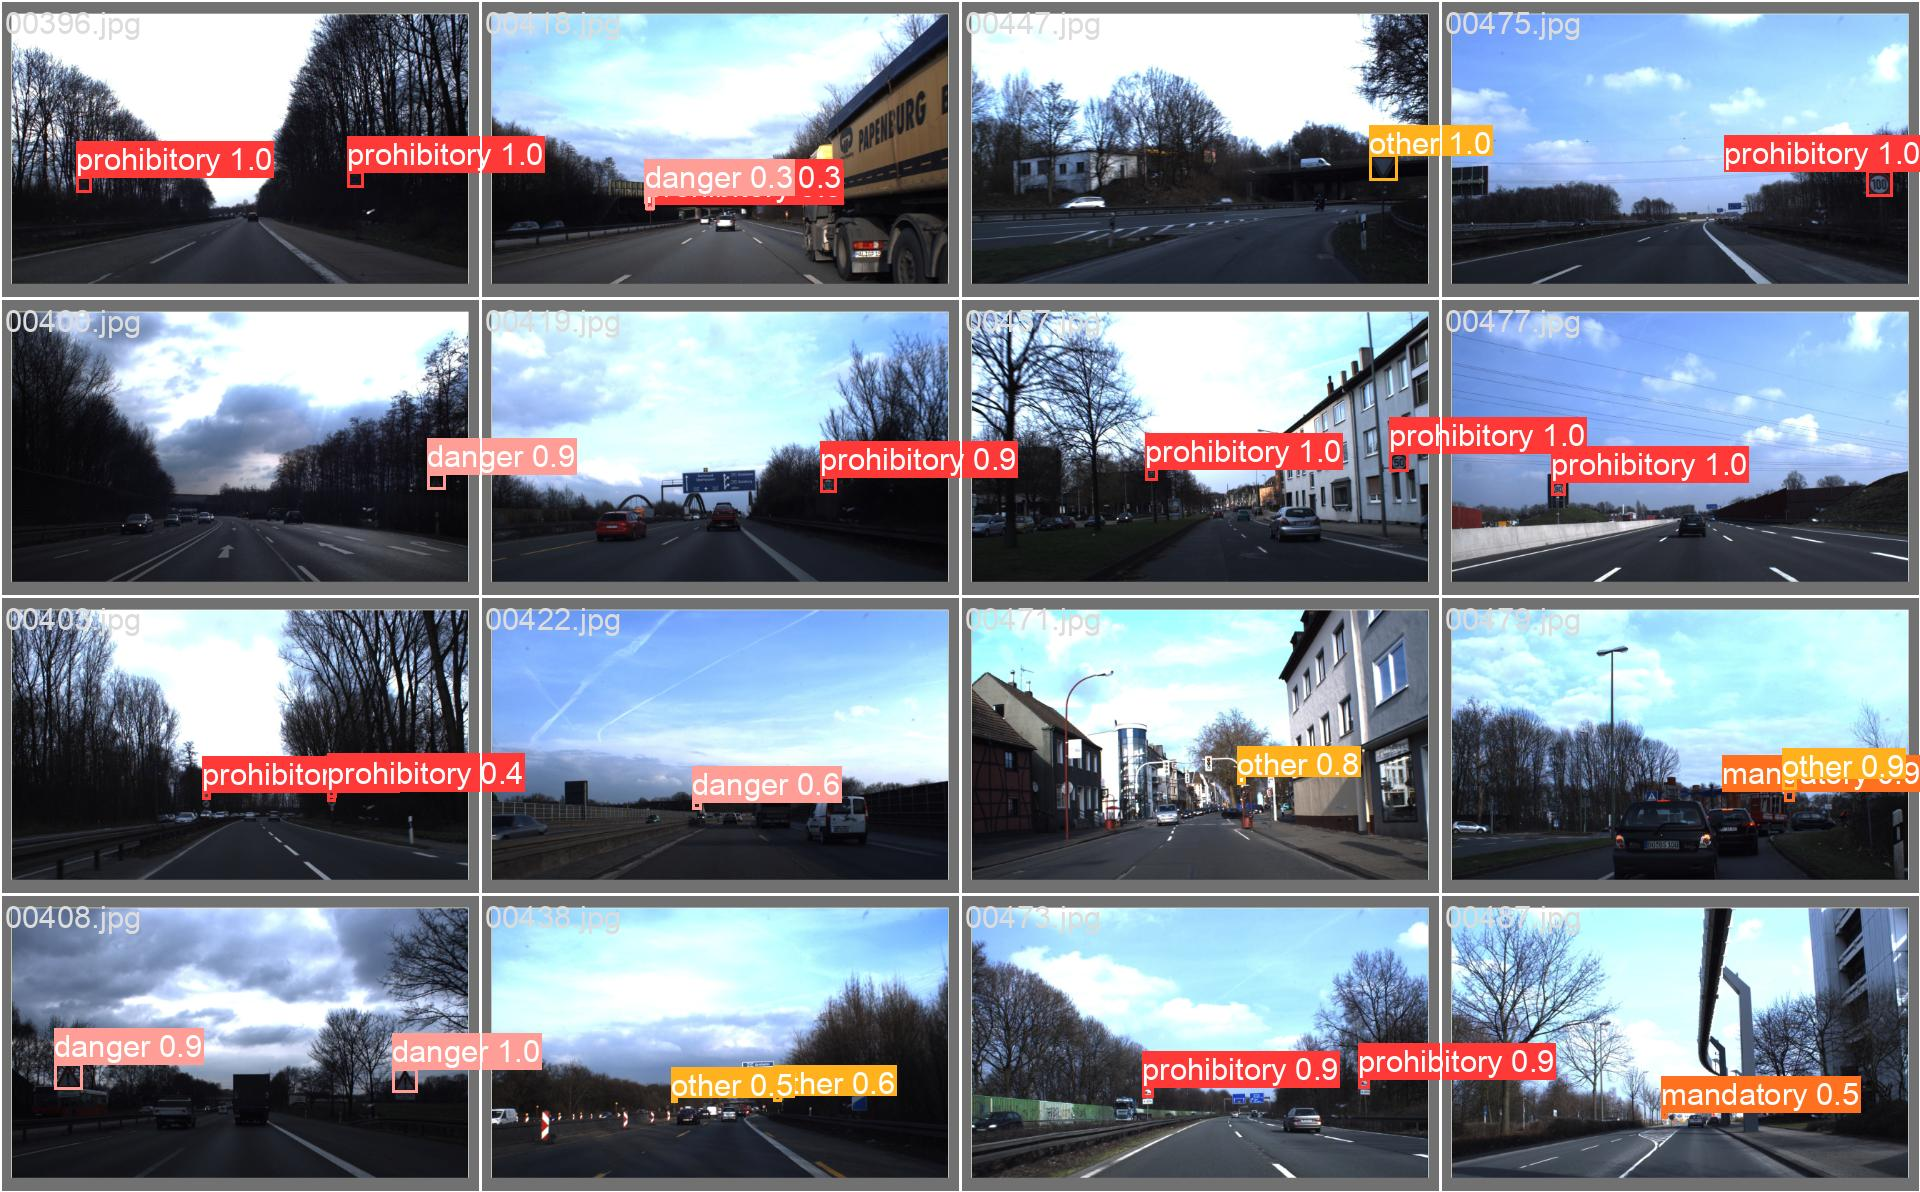

In [ ]:
Image(filename='/content/yolov5/runs/train/exp/val_batch2_pred.jpg', width=1000)

In [ ]:
!python detect.py --source /content/yolov5/runs/train/exp/a.jpg --weights /content/yolov5/runs/train/exp/weights/best.pt


detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolov5/runs/train/exp/a.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/runs/train/exp/a.jpg: 384x640 1 prohibitory, 1 danger, 1 mandatory, 1 other, 27.2ms
Speed: 0.5ms pre-process, 27.2ms inference, 159.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


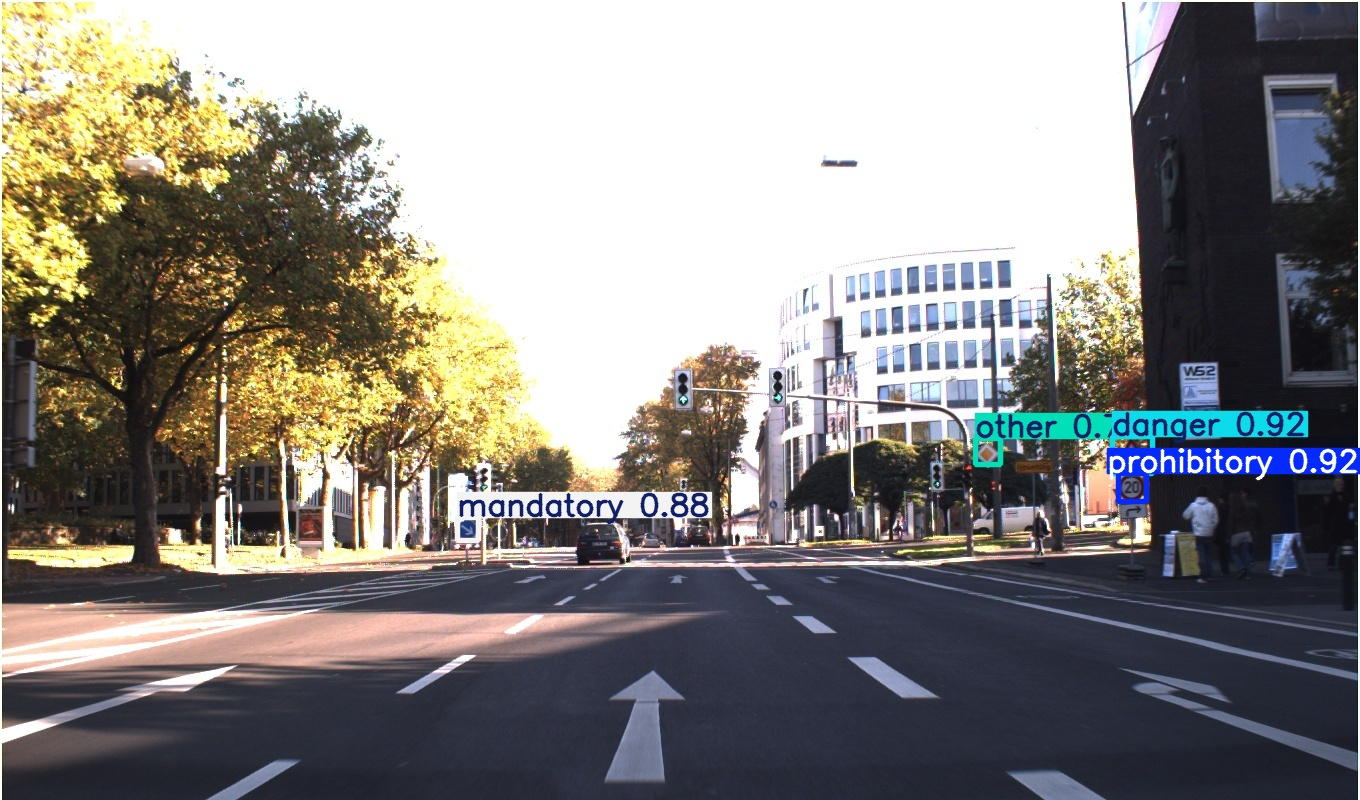

In [ ]:
Image(filename='/content/yolov5/runs/detect/exp2/a.jpg', width=800)

In [ ]:
!ls /content/yolov5/runs/train/exp/weights/


best.pt  last.pt


In [ ]:
!python detect.py --source /content/yolov5/runs/train/exp/traffic-sign-to-test.mp4 --weights /content/yolov5/runs/train/exp/weights/best.pt


detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolov5/runs/train/exp/traffic-sign-to-test.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/56) /content/yolov5/runs/train/exp/traffic-sign-to-test.mp4: 384x640 2 prohibitorys, 44.2ms
video 1/1 (2/56) /content/yolov5/runs/train/exp/traffic-sign-to-test.mp4: 384x640 2 prohibitorys, 7.6ms
video 1/1 (3/56) /content/yolov5/runs/train/exp/traff

In [ ]:
from IPython.display import Video

Video('/content/yolov5/runs/detect/exp3/traffic-sign-to-test.mp4', width=800)

In [ ]:
!python detect.py --source /content/yolov5/runs/train/exp/traffic-sign-to-test2.mp4 --weights /content/yolov5/runs/train/exp/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolov5/runs/train/exp/traffic-sign-to-test2.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/1337) /content/yolov5/runs/train/exp/traffic-sign-to-test2.mp4: 640x384 1 mandatory, 27.5ms
video 1/1 (2/1337) /content/yolov5/runs/train/exp/traffic-sign-to-test2.mp4: 640x384 1 mandatory, 9.7ms
video 1/1 (3/1337) /content/yolov5/runs/train/exp/tr

In [ ]:
Video('/content/yolov5/runs/detect/exp4/traffic-sign-to-test2.mp4', width=800)